<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/main/PROJ03_FinancialMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recursos/Vase_004 - Magalu - Tab_Dados.csv')

observando dados

In [4]:
df.sample(15)

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
208,11/4/2021,"11,82","10,93","11,50","11,08",34.112.300,"11,08"
26,2/10/2021,"26,12","25,11","26,10","25,30",40.037.100,"25,28"
155,8/18/2021,"19,50","18,63","19,42","18,84",33.337.500,"18,84"
223,11/26/2021,"8,57","8,03","8,48","8,06",63.464.200,"8,06"
90,5/17/2021,"19,22","18,73","19,12","18,86",15.761.200,"18,85"
222,11/25/2021,"9,04","8,61","8,84","8,70",58.775.400,"8,70"
240,12/21/2021,"6,61","6,22","6,42","6,42",112.070.500,"6,42"
85,5/10/2021,"19,98","19,05","19,89","19,20",22.189.400,"19,19"
152,8/13/2021,"21,17","19,88","21,10","20,27",44.193.200,"20,27"
67,4/13/2021,"22,29","21,48","21,72","22,20",29.003.400,"22,18"


In [5]:
df.shape

(247, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        247 non-null    object
 1   Maior       247 non-null    object
 2   Menor       247 non-null    object
 3   Abertura    247 non-null    object
 4   Fechamento  247 non-null    object
 5   Volume      247 non-null    object
 6   Adj Close   247 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


observa-se a necessidade de trasnformar a coluna data para datetime e as outras colunas para float

In [7]:
df['Data'] = pd.to_datetime(df['Data'])

In [8]:
for col in ['Maior', 'Menor', 'Abertura', 'Fechamento', 'Adj Close']:
  df[col]  = pd.to_numeric(df[col].str.replace( ',' , '.' ))

ERRO: não foi possivel converter a coluna 'Adj Close' por conter virgulas
AÇÃO: retirar virgulas

In [9]:
df['Volume'] = pd.to_numeric(df['Volume'].str.replace( '.' , ''))

In [10]:
df.sample(3)

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
193,2021-10-13,14.65,14.29,14.42,14.50,29912600,14.5
12,2021-01-20,25.53,24.12,24.18,25.42,48089300,25.4
111,2021-06-16,21.00,20.06,20.95,20.31,29179100,20.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


feito  
dados trasnformados para o tipos corretos

In [12]:
df.describe()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,2021-07-02 21:28:25.263158016,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541174
min,2021-01-04 00:00:00,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,2021-04-05 12:00:00,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,2021-07-02 00:00:00,20.650000,19.930000,20.280000,20.270000,3.130900e+07,20.260000
75%,2021-09-29 12:00:00,22.595000,21.985000,22.375000,22.200000,4.742785e+07,22.180000
max,2021-12-30 00:00:00,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220000
std,NaN,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.630768


o describe não é muito elucidativo  
porém observa-se que como a media dos valores gira entorno do 18 e o desvio padrao é ao redor de 5.  
compreende-se que há uma grande variabilidade desses dados.

In [13]:
# series temporais
dados = df.set_index('Data')

dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.58,24.87,25.26,25.20,25706100,25.18
2021-01-05,25.18,24.34,25.10,24.76,25431900,24.74
2021-01-06,24.66,23.42,24.65,23.46,51799000,23.44
2021-01-07,23.85,22.95,23.64,23.16,42146600,23.14
2021-01-08,24.30,23.02,23.19,23.84,43988100,23.82


Text(0, 0.5, 'Valor da ação (R$)')

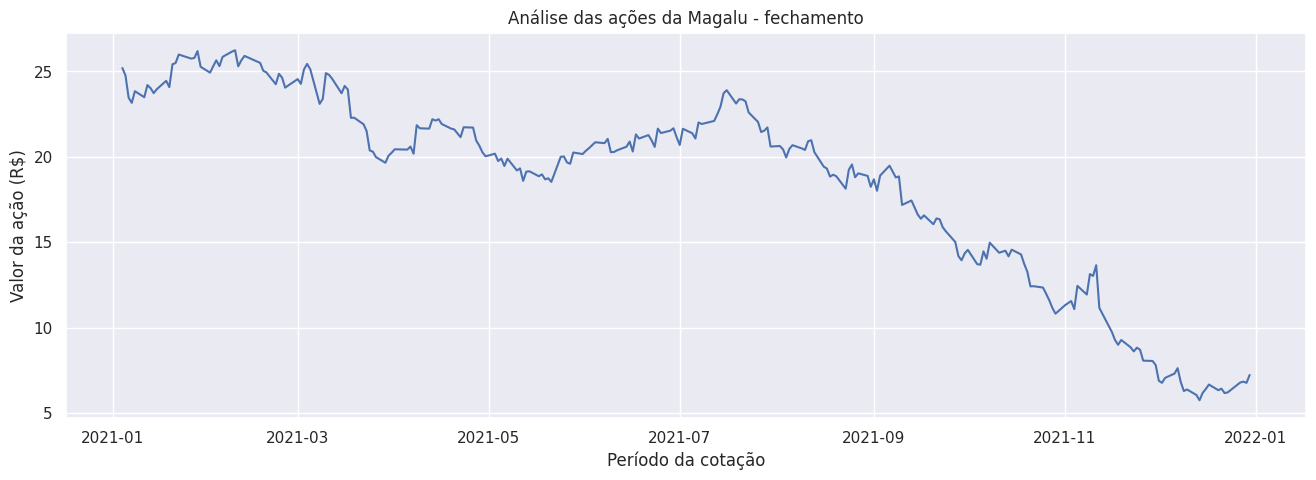

In [14]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(16,5))

plt.title('Análise das ações da Magalu - fechamento')

plt.plot(dados.index, dados['Fechamento']);

plt.xlabel('Período da cotação')

plt.ylabel('Valor da ação (R$)')

trabalhando com media movel para corresponder ao comportamento dos fenomenos

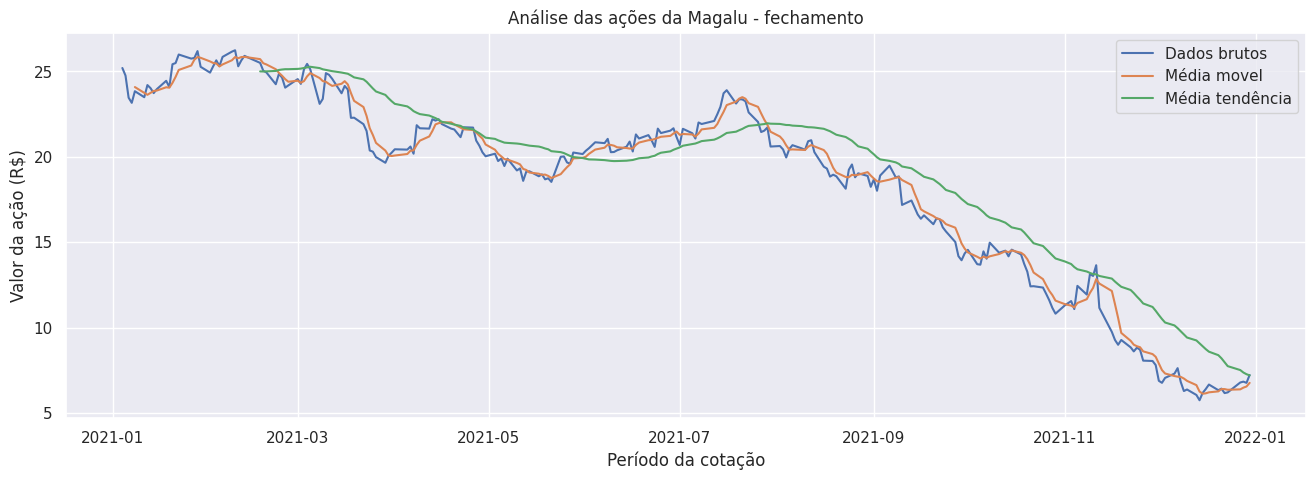

In [15]:
Media_Movel = df['Fechamento'].rolling(5).mean()

Media_Tendencia = df['Fechamento'].rolling(30).mean()

sns.set_theme(style="darkgrid")

plt.figure(figsize=(16,5))

plt.title('Análise das ações da Magalu - fechamento')

#grafico original
plt.plot(dados.index, dados['Fechamento'], label = 'Dados brutos');

# grafico da media movel 5
plt.plot(dados.index, Media_Movel, label = 'Média movel');

# grafico da media movel 30
plt.plot(dados.index, Media_Tendencia, label = 'Média tendência');

# rótulos de eixo
plt.xlabel('Período da cotação')
plt.ylabel('Valor da ação (R$)')

#plotando legenda
plt.legend(loc='upper right')

criando um boxplot mensal para avaliar a disperção dos dados ao longo do ano

<Axes: xlabel='Mes', ylabel='Fechamento'>

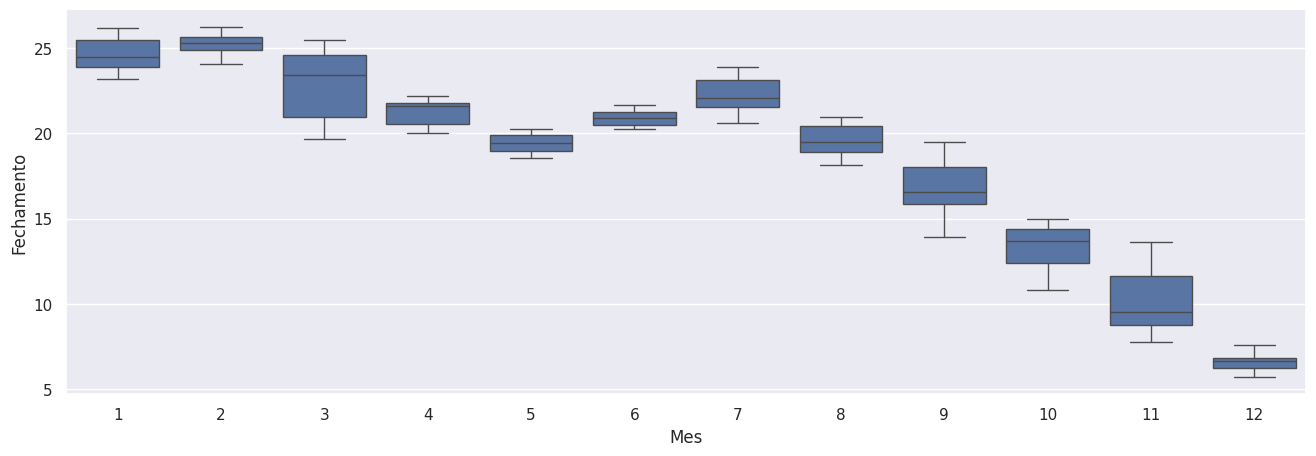

In [16]:
# criando a coluna de meses
df['Mes'] = df['Data'].dt.month

plt.figure( figsize= (16,5) )
sns.boxplot( data= df, x = 'Mes', y= 'Fechamento')

In [18]:
# utilizando o describe para bater valores absolutos observados no grafico

df.groupby(['Mes']).describe()['Fechamento']

,count,mean,min,25%,50%,75%,max,std
Mes,,,,,,,,
1,19.0,24.644737,23.16,23.9000,24.450,25.4550,26.19,0.960280
2,18.0,25.208889,24.05,24.8775,25.300,25.6500,26.24,0.656021
3,23.0,22.855217,19.65,20.9400,23.390,24.5600,25.44,1.976698
4,20.0,21.249000,20.03,20.5600,21.625,21.7600,22.20,0.735297
5,21.0,19.430476,18.53,18.9700,19.460,19.9000,20.25,0.564973
6,21.0,20.898095,20.27,20.5000,20.890,21.2700,21.67,0.463116
7,21.0,22.232857,20.60,21.5300,22.040,23.1200,23.90,0.977574
8,22.0,19.656818,18.13,18.8975,19.485,20.4525,20.97,0.885827
9,21.0,16.746190,13.94,15.8700,16.570,18.0100,19.48,1.628581


criando um grafico financeiro de abertura e fechamento de ações

In [20]:
grafico_financ = go.Figure(
    data=[
        go.Candlestick(
            x= df.index,
            open= df['Abertura'],
            high = df['Maior'],
            low = df['Menor'],
            close = df['Fechamento']

        )
    ]
)

grafico_financ.show()